In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from pprint import pprint

import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles

import torch
import torch.utils.data as utils
import torch.nn as nn
from torch.autograd import Variable
from livelossplot import PlotLosses

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

input_size = 2         # Input data dimensionality
hidden_size = 3        # The number of nodes at the hidden layer
num_classes = 2        # The number of output classes
num_epochs = 20         # The number of times entire dataset is trained
batch_size = 20        # The size of input data for one iteration
learning_rate = 0.01  # The speed of convergence

# Create Data
# Create Random Data

# dataset params
N = 50000
factor = 0.1
noise = 0.1

# generate data
X, y = make_circles(
    n_samples=N,
    shuffle=False,
    factor=factor,
    noise=noise)

# Create Torch Tensors

X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)



In [2]:

# Create Torch Dataset

dataset = utils.TensorDataset(X_tensor,y_tensor)

# Define Torch DataLoader

dataloader = utils.DataLoader(dataset,
                              batch_size=batch_size,
                              shuffle=True)

# Build Network
# Architecture

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()                    # Inherited from the parent class nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)  
        self.logistic = nn.LogSigmoid()                          
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        """Forward pass: stacking each layer together"""
        out = self.fc1(x)
        out = self.logistic(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

net = Net(input_size, hidden_size, num_classes)


In [3]:

# Define Loss Function

criterion = nn.CrossEntropyLoss()

# Select Optimizer

optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Train Model
# Basic Training

for epoch in range(num_epochs):
    for i, (features, label) in enumerate(dataloader):
        
        features = Variable(features.float())         
        label = Variable(label.long())

        # Initialize the hidden weights
        optimizer.zero_grad()  
        
        # Forward pass: compute output given features
        outputs = net(features)
        
        # Compute the loss
        loss = criterion(outputs, label)
        # Backward pass: compute the gradients
        loss.backward()
        # Update the weights
        optimizer.step()



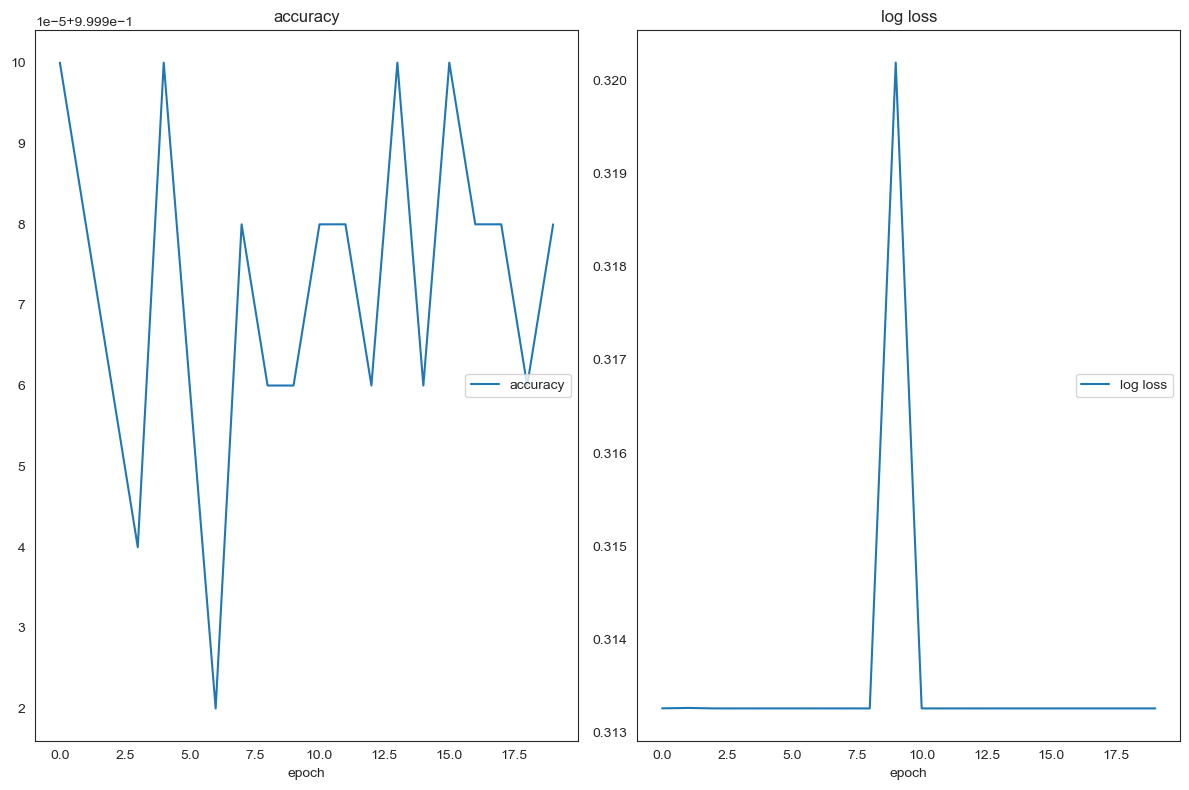

accuracy
	accuracy         	 (min:    1.000, max:    1.000, cur:    1.000)
log loss
	log loss         	 (min:    0.313, max:    0.320, cur:    0.313)


In [4]:

# Plotting losses in real time

liveloss = PlotLosses()

for epoch in range(num_epochs):
    print(epoch)
    logs = {}
    running_loss = 0.0
    running_corrects = 0    
    for i, (features, label) in enumerate(dataloader):
        
        features = Variable(features.float())         
        label = Variable(label.long())

        # Intialize the hidden weight to all zeros
        optimizer.zero_grad()  
        
        # Forward pass: compute the output class given a image
        outputs = net(features)
        
        # Compute the loss: difference between the output class and the pre-given label
        loss = criterion(outputs, label)
        # Backward pass: compute the weight
        loss.backward()
        # Optimizer: update the weights of hidden nodes
        optimizer.step()
        
        _, preds = torch.max(outputs, 1)
        running_loss += loss.detach() * features.size(0)
        running_corrects += torch.sum(preds == label.data)

        epoch_loss = running_loss / len(dataset)
        epoch_acc = running_corrects.float() / len(dataloader.dataset)        
        logs['log loss'] = loss.item()
        logs['accuracy'] = epoch_acc.item()

    liveloss.update(logs)
    liveloss.draw()        

